---
---
# Introducci√≥n a la optimizaci√≥n lineal

En esta √∫ltima lecci√≥n, nos desviaremos de las t√©cnicas que emplean m√©todos est√°ndar de aprendizaje autom√°tico para centrarnos en un √°rea que, si bien fundamentalmente es algo distinta, es tan √∫til y aplicable como todo lo visto anteriormente. Concretamente, la optimizaci√≥n lineal es, como su nombre indica, el √°rea de estudio de problemas de maximizaci√≥n (resp. minimizaci√≥n) de funciones donde, tanto la propia funci√≥n como las restricciones de dominio, son lineales.

Comenzaremos inicialmente por introducir algunos conceptos de tipo geom√©trico, que nos ser√°n de ayuda para entender el contexto. Para lectores con conocimientos matem√°ticos s√≥lidos, recomendamos seguir los contenidos de este [curso abierto del MIT](https://ocw.mit.edu/courses/6-251j-introduction-to-mathematical-programming-fall-2009/pages/lecture-notes/).

---
## Nociones geom√©tricas: Convexidad

El primer concepto de obligada introducci√≥n es el de convexidad, tanto de un conjunto como de una funci√≥n. Diremos que un conjunto es convexo cuando, para cualesquiera dos puntos del mismo, el segmento que los une est√° contenido dentro del conjunto.

> Ejercicio: ¬øSabr√≠as decir cu√°les de √©stos conjuntos son convexos?

![](http://d2l.ai/_images/pacman.svg)

En t√©rminos formales, dir√≠amos que un conjunto $C\subset\mathbb{R}^n$ del espacio eucl√≠deo es convexo cuando, para cualesquiera puntos $x,y\in C$ y n√∫mero $\lambda \in (0,1)$, el punto $\lambda x+(1-\lambda)y$ tambi√©n est√° en $C$. N√≥tese que, de la forma anterior, se puede expresar cualquier punto del interior del segmento que une a los puntos $x$ e $y$. 

Una propiedad muy interesante que usaremos relacionada con este concepto es el hecho de que, cuando disponemos de dos conjuntos convexos, su **intersecci√≥n** tambi√©n lo es:

![](http://d2l.ai/_images/convex-intersect.svg)

De forma similar, diremos que una funci√≥n real $f:C\rightarrow\mathbb{R}$ es convexa cuando

$$\lambda f(x) + (1-\lambda) f(y) \geq f(\lambda x + (1-\lambda) y),$$

para todos $x,y\in C$, $\lambda\in(0,1)$. Evidentemente, la definici√≥n de funci√≥n convexa exige que su dominio $C$ tambi√©n lo sea. Veamos ahora de forma intuitiva qu√© nos quiere decir esta definici√≥n:

> Ejercicio: ¬øSabr√≠as decir qu√© funciones son convexas?

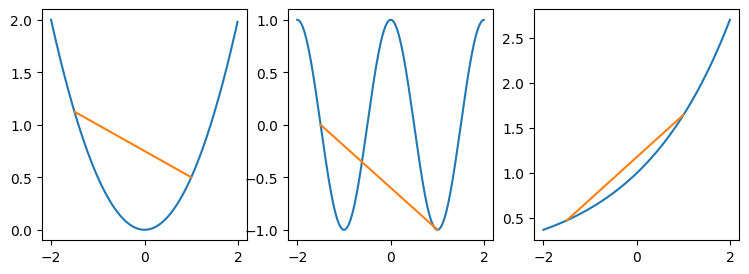

In [1]:
# Librer√≠as
import numpy as np
import matplotlib.pyplot as plt

# Definimos funciones
f = lambda x: 0.5 * x**2
g = lambda x: np.cos(np.pi * x)
h = lambda x: np.exp(0.5 * x)

# Dibujamos sus gr√°ficas
x, segment = np.arange(-2, 2, 0.01), np.array([-1.5, 1])
_, axes = plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    ax.plot(x, func(x), segment, func(segment))
plt.show()

En t√©rminos de c√°lculo, la convexidad de una funci√≥n se puede estudiar de manera c√≥moda a partir del car√°cter semidefinido positivo de la matriz hessiana en todo el dominio. La raz√≥n por la que, sin duda, la convexidad es una propiedad deseable en nuestro √°mbito, es debido a que los m√°ximos (resp. m√≠nimos) locales de funciones convexas son, de hecho, globales. Esto tiene aplicaciones en los siguientes √°mbitos:
* Problemas generales de optimizaci√≥n convexa, a partir de la desigualdad de Jensen.
* T√©rminos a√±adidos a funciones de p√©rdida en determinados contextos del *machine learning* para asegurar la convexidad en una cierta regi√≥n.
* Problemas de naturaleza f√≠sica variacional donde intervienen herramientas como los **multiplicadores de Lagrange**.

---

## Nociones geom√©tricas: Linealidad

Naturalmente que las funciones lineales son, en particular, convexas, por lo que todo lo introducido anteriormente es aplicable. Llegados a este punto, veamos qu√© interpretaci√≥n geom√©trica tienen las funciones y/o restricciones lineales dentro del contexto de un problema. Cuando escribimos una restricci√≥n lineal, por ejemplo que la suma de dos n√∫meros sea menor o igual que uno, tiene el siguiente aspecto:

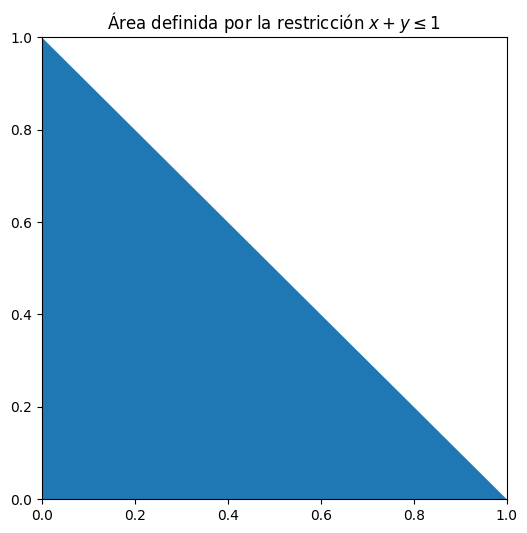

In [28]:
# Definimos el dominio
x = np.arange(-1, 1.01, 0.05)
# Definimos la funci√≥n de referencia
y1 = lambda x: -x+1
# Definimos una funci√≥n auxiliar para poder realizar el dibujo
y2 = lambda x: x-25

# Mapeamos el dibujo
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(6, 6))
ax.set_xlim((0,1))
ax.set_ylim((0,1))
ax.fill_between(x, y1(x), y2(x))
ax.set_title('√Årea definida por la restricci√≥n $x+y\leq 1$')
plt.show()

El conjunto descrito por los puntos que cumplen la restricci√≥n lineal se conoce como **semiespacio**, que es ciertamente convexo aunque no acotado. Es por ello que, normalmente, se trabaja con m√∫ltiples restricciones, dando lugar a conjuntos formados por las intersecciones de estos semiespacios, que s√≠ son acotados, como en el siguiente ejemplo tomado de la documentaci√≥n de `scipy`:

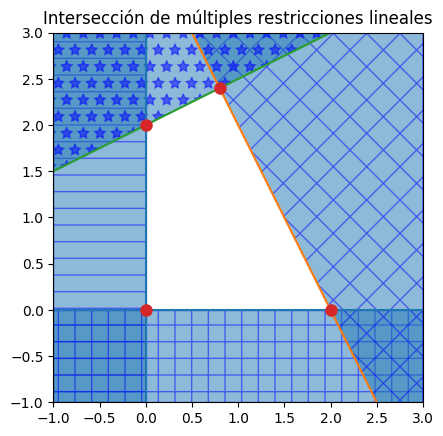

In [15]:
from scipy.spatial import HalfspaceIntersection
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
xlim, ylim = (-1, 3), (-1, 3)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
x = np.linspace(-1, 3, 100)
symbols = ['-', '+', 'x', '*']
signs = [0, 0, -1, -1]
fmt = {"color": None, "edgecolor": "b", "alpha": 0.5}
halfspaces = np.array([[-1, 0., 0.],
                       [0., -1., 0.],
                       [2., 1., -4.],
                       [-0.5, 1., -2.]])
feasible_point = np.array([0.5, 0.5])
hs = HalfspaceIntersection(halfspaces, feasible_point)
for h, sym, sign in zip(halfspaces, symbols, signs):
    hlist = h.tolist()
    fmt["hatch"] = sym
    if h[1]== 0:
        ax.axvline(-h[2]/h[0], label='{}x+{}y+{}=0'.format(*hlist))
        xi = np.linspace(xlim[sign], -h[2]/h[0], 100)
        ax.fill_between(xi, ylim[0], ylim[1], **fmt)
    else:
        ax.plot(x, (-h[2]-h[0]*x)/h[1], label='{}x+{}y+{}=0'.format(*hlist))
        ax.fill_between(x, (-h[2]-h[0]*x)/h[1], ylim[sign], **fmt)
x, y = zip(*hs.intersections)
ax.plot(x, y, 'o', markersize=8)
ax.set_title("Intersecci√≥n de m√∫ltiples restricciones lineales")
plt.show()

En estas circunstancias, la optimizaci√≥n de funciones lineales es f√°cilmente resoluble mediante el conocido como **algoritmo del simplex**, que se basa en el hecho de que la soluci√≥n de un problema de optimizaci√≥n lineal con restricciones lineales se encuentra en uno de los **v√©rtices** del dominio, que arribe hemos se√±alado de color rojo.

A continuaci√≥n, vamos a desglosar un excelente caso de uso de [Maxime Labonne](https://mlabonne.github.io/blog/).

---
## Caso de uso: Optimizaci√≥n lineal

Para la ejecuci√≥n de esta parte del cuaderno, recomendamos al alumno emplear [Google Colab](https://colab.research.google.com/?hl=es).

Supongamos que estamos comandando un ej√©rcito de espadachines, arqueros y jinetes, disponiendo de una serie de recursos materiales para su manutenci√≥n y remuneraci√≥n, y queremos sacar el m√°ximo partido a la capacidad o fuerza de nuestra tropa. Para ello, somos provistos de la siguiente relaci√≥n entre milicia, recursos requeridos y fuerza:

<br/>

| Unidad | üåæ Comida | ü™µ Madera | ü•á Oro | üí™ Fuerza |
| :--- | :---: | :---: | :---: | :---: |
| üó°Ô∏è Espadach√≠n | 60 | 20 | 0 | 70 |
| üèπ Arquero | 80 | 10 | 40 | 95 |
| üêé Jinetes | 140 | 0 |100 | 230 |

<br/>

En primer lugar, instalaremos las dependencias necesarias para tener acceso a algoritmos de optimizaci√≥n que nos permitan resolverlo. Existen m√∫ltiples apra tal fin, pero debido a su flexibilidad, facilidad de uso, extensi√≥n y optimizaci√≥n interna, escogeremos [Google OR-Tools](https://developers.google.com/optimization). 

In [16]:
!python -m pip install --upgrade --user -q ortools

ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from ortools.linear_solver import pywraplp

# Create a solver using the GLOP backend
solver = pywraplp.Solver('Maximize army power', pywraplp.Solver.GLOP_LINEAR_PROGRAMMING)

Una vez hemos instanciado el `solver`, es momento de definir las variables de nuestro problema, que son las distintas unidades que formar√°n parte de las tropas. OR-Tools acepta tres tipos de variables:

* `NumVar` para continuas.
* `IntVar` para enteros.
* `BoolVar` para dicot√≥micas.

Puesto que no tenemos realmente una cota superior, y precisamos de n√∫meros enteros, instanciamos nuestras variables como sigue:

In [18]:
swordsmen = solver.IntVar(0, solver.infinity(), 'espadachines')
bowmen = solver.IntVar(0, solver.infinity(), 'arqueros')
horsemen = solver.IntVar(0, solver.infinity(), 'jinetes')

Seguidamente, nos toca definir el conjunto de restricciones que aplican en nuestro caso. Dado que los recursos naturales son limitados, no podremos tener e nla pr√°ctica un n√∫mero infinito de efectivos; de hecho, se nos proporciona esta lista actualizada de recursos disponibles:

<br/>

| üåæ Comida | ü™µ Madera | ü•á Oro |
| :---: | :---: | :---: |
| 1200 | 800 | 600 | 

<br/>

Consecuentemente, aparecen las siguientes restricciones para cada recurso:

In [19]:
solver.Add(swordsmen*60 + bowmen*80 + horsemen*140 <= 1200) # Comida
solver.Add(swordsmen*20 + bowmen*10 <= 800)                 # Madera
solver.Add(bowmen*40 + horsemen*100 <= 600)                 # Oro

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x00000203365FFA20> >

Finalmente, nuestra pretensi√≥n es tener la tropa m√°s efectiva posible, lo cual es equivalente a **maximizar** la fuerza de la misma. As√≠ pues, nuestra funci√≥n objetivo ser√°:

In [20]:
solver.Maximize(swordsmen*70 + bowmen*95 + horsemen*230)

Ya estamos listos para resolver el problema original:

In [21]:
status = solver.Solve()

# Si encontr√≥ soluci√≥n √≥ptima, muestra los resultados
if status == pywraplp.Solver.OPTIMAL:
  print('================= Soluci√≥n =================')
  print(f'Resuelto en {solver.wall_time():.2f} milisegundos con {solver.iterations()} iteraciones')
  print()
  print(f'Fuerza √≥ptima = {solver.Objective().Value()} üí™')
  print('Tropa:')
  print(f' - üó°Ô∏è Espadachines = {swordsmen.solution_value()}')
  print(f' - üèπ Arqueros = {bowmen.solution_value()}')
  print(f' - üêé Jinetes = {horsemen.solution_value()}')
else:
  print('No se encontr√≥ una soluci√≥n √≥ptima.')

================= Soluci√≥n =================
Resuelto en 374.00 milisegundos con 2 iteraciones

Fuerza √≥ptima = 1800.0 üí™
Tropa:
 - üó°Ô∏è Espadachines = 6.0000000000000036
 - üèπ Arqueros = 0.0
 - üêé Jinetes = 5.999999999999999
